<a href="https://colab.research.google.com/github/Jiho-korea/DeepLearning/blob/master/kaggle_4%EC%98%88%EC%A0%9C3_%ED%95%99%EC%83%9D%EC%84%B1%EC%A0%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
!pip install --upgrade tensorflow==1.15.0

     |████████████████████████████████| 412.3MB 36kB/s 
     |████████████████████████████████| 3.8MB 37.3MB/s 
     |████████████████████████████████| 512kB 43.5MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=84921d4f3964a26ab9b768f63dda231b53c79bdc746a107a6e9a2f0f9ccfd0b1
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: 

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
tf.set_random_seed(777)

In [0]:
# 데이터 확인, 분석을 위해 pandas 를 사용
xy_df = pd.read_csv('/gdrive/My Drive/Colab Notebooks/DeepLearningPrac/tensorflowPrac/multinomial/kaggle/예제3_학생성적.csv')
xy_df = xy_df.dropna(how='all', axis=0)  # 결측치 제거

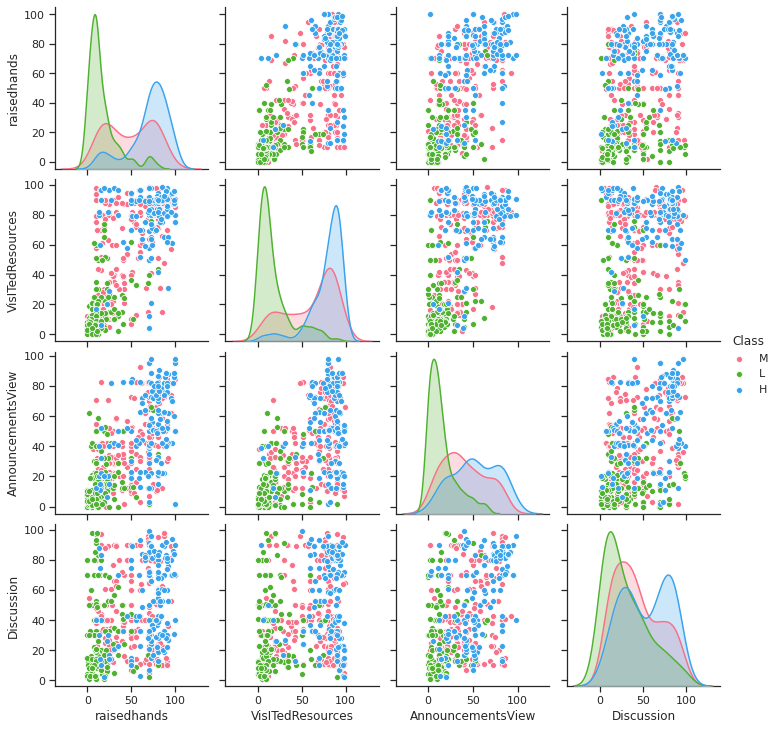

In [0]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(xy_df, hue="Class", palette="husl")

In [0]:
xy_df.drop(['Topic','PlaceofBirth','StageID'], axis=1, inplace=True)

In [0]:
xy_df.columns = ['성별', '국적', '학년', '반', '학기', '부모', '질문횟수', '교육과정 확인 횟수', '공지 확인 횟수', '토론 참여 횟수', '학부모 응답 조사', '학부모 만족도', '학생 결석일', '등급']  # 칼럼명 한글로 변경
xy_df # 데이터프레임 확인

,성별,국적,학년,반,학기,부모,질문횟수,교육과정 확인 횟수,공지 확인 횟수,토론 참여 횟수,학부모 응답 조사,학부모 만족도,학생 결석일,등급
0,M,KW,G-04,A,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,G-04,A,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,G-04,A,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,G-04,A,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,G-04,A,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,G-08,A,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,G-08,A,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,G-08,A,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,G-08,A,F,Father,30,17,14,57,No,Bad,Above-7,L


In [0]:
# 문자열 칼럼 레이블 인코딩 과정
labelEncoder = LabelEncoder()

In [0]:
# 레이블 인코딩 함수
def labelEncoding(df):
  df.loc[:,['성별']] = labelEncoder.fit_transform(df.loc[:,['성별']].values.reshape(-1)) # 성별 레이블 인코딩
  print("성별 : ", labelEncoder.classes_)
  df.loc[:,['국적']] = labelEncoder.fit_transform(df.loc[:,['국적']].values.reshape(-1)) # 국적 레이블 인코딩
  print("국적 : ", labelEncoder.classes_)
  df.loc[:,['반']] = labelEncoder.fit_transform(df.loc[:,['반']].values.reshape(-1)) # 반 레이블 인코딩
  print("반 : ", labelEncoder.classes_)
  df.loc[:,['학년']] = labelEncoder.fit_transform(df.loc[:,['학년']].values.reshape(-1)) # 학년 레이블 인코딩
  print("학년 : ", labelEncoder.classes_)
  df.loc[:,['학기']] = labelEncoder.fit_transform(df.loc[:,['학기']].values.reshape(-1)) # 학기 레이블 인코딩
  print("학기 : ", labelEncoder.classes_)
  df.loc[:,['부모']] = labelEncoder.fit_transform(df.loc[:,['부모']].values.reshape(-1)) # 부모 레이블 인코딩
  print("부모 : ", labelEncoder.classes_)
  df.loc[:,['학부모 응답 조사']] = labelEncoder.fit_transform(df.loc[:,['학부모 응답 조사']].values.reshape(-1)) 
  print("학부모 응답 조사 : ", labelEncoder.classes_)
  df.loc[:,['학부모 만족도']] = labelEncoder.fit_transform(df.loc[:,['학부모 만족도']].values.reshape(-1))
  print("학부모 만족도 : ", labelEncoder.classes_) 
  df.loc[:,['학생 결석일']] = labelEncoder.fit_transform(df.loc[:,['학생 결석일']].values.reshape(-1)) 
  print("학생 결석일 : ", labelEncoder.classes_)
  # 레이블 데이터셋 LabelEncoding
  df.loc[:,['등급']] = labelEncoder.fit_transform(df.loc[:,['등급']].values.reshape(-1)) 
  print("등급 : ", labelEncoder.classes_)

In [0]:
labelEncoding(xy_df)

성별 :  ['F' 'M']
국적 :  ['Egypt' 'Iran' 'Iraq' 'Jordan' 'KW' 'Lybia' 'Morocco' 'Palestine'
 'SaudiArabia' 'Syria' 'Tunis' 'USA' 'lebanon' 'venzuela']
반 :  ['A' 'B' 'C']
학년 :  ['G-02' 'G-04' 'G-05' 'G-06' 'G-07' 'G-08' 'G-09' 'G-10' 'G-11' 'G-12']
학기 :  ['F' 'S']
부모 :  ['Father' 'Mum']
학부모 응답 조사 :  ['No' 'Yes']
학부모 만족도 :  ['Bad' 'Good']
학생 결석일 :  ['Above-7' 'Under-7']
등급 :  ['H' 'L' 'M']


In [0]:
xy_df

,성별,국적,학년,반,학기,부모,질문횟수,교육과정 확인 횟수,공지 확인 횟수,토론 참여 횟수,학부모 응답 조사,학부모 만족도,학생 결석일,등급
0,1,4,1,0,0,0,15,16,2,20,1,1,1,2
1,1,4,1,0,0,0,20,20,3,25,1,1,1,2
2,1,4,1,0,0,0,10,7,0,30,0,0,0,1
3,1,4,1,0,0,0,30,25,5,35,0,0,0,1
4,1,4,1,0,0,0,40,50,12,50,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,3,5,0,1,0,5,4,5,8,0,0,0,1
476,0,3,5,0,0,0,50,77,14,28,0,0,1,2
477,0,3,5,0,1,0,55,74,25,29,0,0,1,2
478,0,3,5,0,0,0,30,17,14,57,0,0,0,1


In [0]:
pd.DataFrame(xy_df.mean(), columns=["평균 값"])

,평균 값
성별,0.635417
국적,4.345833
학년,2.906250
반,0.472917
학기,0.489583
부모,0.410417
질문횟수,46.775000
교육과정 확인 횟수,54.797917
공지 확인 횟수,37.918750
토론 참여 횟수,43.283333


In [0]:
y_data = xy_df.iloc[:,-1].values.reshape(-1,1)  # 레이블 데이터(종류)를 numpy로 추출

In [0]:
x_data = xy_df.iloc[:,:-1].values  # 피쳐데이터를 numpy로 추출

In [0]:
print(y_data.shape)
print(y_data[:7]) #레이블 확인

(480, 1)
[[2]
 [2]
 [1]
 [1]
 [2]
 [2]
 [1]]


In [0]:
print(x_data.shape)
print(x_data[:7,:]) # 피쳐 확인

(480, 13)
[[ 1  4  1  0  0  0 15 16  2 20  1  1  1]
 [ 1  4  1  0  0  0 20 20  3 25  1  1  1]
 [ 1  4  1  0  0  0 10  7  0 30  0  0  0]
 [ 1  4  1  0  0  0 30 25  5 35  0  0  0]
 [ 1  4  1  0  0  0 40 50 12 50  0  0  0]
 [ 0  4  1  0  0  0 42 30 13 70  1  0  0]
 [ 1  4  4  0  0  0 35 12  0 17  0  0  0]]


In [0]:
np.unique(y_data, return_counts=True)

(array([0, 1, 2]), array([142, 127, 211]))

In [0]:
# 테스트세트를 분리
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, stratify=y_data, random_state=777) # 전체 데이터중 30%

In [0]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([ 99,  89, 148]))

In [0]:
print("학습용 ",x_train.shape, "\t", y_train.shape) # 학습용 피쳐, 레이블 데이터 
print("테스트용 ",x_test.shape, "\t", y_test.shape) # 테스트용 피쳐, 레이블 데이터

학습용  (336, 13) 	 (336, 1)
테스트용  (144, 13) 	 (144, 1)


In [0]:
scaler = StandardScaler()

In [0]:
nb_classes = 3 # 분류할 클래스의 개수

In [0]:
# 텐서플로우 그래프 그리기
num_x = x_data.shape[1]
X = tf.placeholder(tf.float32, shape=[None, num_x]) 
Y = tf.placeholder(tf.int32, shape=[None, 1])
W = tf.Variable(tf.random.normal([num_x , nb_classes]), name='weight') 
b = tf.Variable(tf.random.normal([nb_classes]), name='bias')

In [0]:
Y_one_hot = tf.one_hot(Y, nb_classes)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])

In [0]:
#softmax 는 벡터 그대로 유지 시킨 상태에서 확률만 표시해 줌 
logits = tf.matmul(X,W) + b
hypothesis = tf.nn.softmax(logits)

In [0]:
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y_one_hot)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
cost = tf.reduce_mean(cost_i)

In [0]:
train = tf.train.GradientDescentOptimizer(learning_rate=1e-3).minimize(cost)

In [0]:
prediction = tf.argmax(hypothesis, 1)

In [0]:
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))

In [0]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [0]:
sess = tf.Session()

In [0]:
sess.run(tf.global_variables_initializer())

In [0]:
w_history = [] # 변화하는 가중치 행렬을 담기위한 리스트
cost_list = [] # 감소하는 cost를 담기위한 리스트

In [0]:
n_fold = 5 # 5개의 폴드
skf = StratifiedKFold(n_splits=n_fold) 
cv_accuracy = [] # 폴드세트별 정확도를 저장할 리스트

In [0]:
epochs = 7001
  
for step in range(epochs):
  fold_cost = 0
  fold_accuracy = 0
  for train_index, test_index in skf.split(x_train, y_train):
    train_random_index = np.random.permutation(train_index)
    test_random_index = np.random.permutation(test_index)

     # 학습폴드, 검증폴드 분리(피쳐, 레이블 별)
    train_feature_fold, val_feature_fold = x_train[train_random_index], x_train[test_random_index]
    train_label_fold, val_label_fold = y_train[train_random_index], y_train[test_random_index]

    # 학습폴드를 기준으로 표준화
    scaler.fit(train_feature_fold)
    
    # 학습폴드를 기준으로 학습폴드, 검증폴드를 표준화
    train_feature_fold_scaled = scaler.transform(train_feature_fold) 
    val_feature_fold_scaled = scaler.transform(val_feature_fold) 

    # 학습폴드로 학습 
    cost_val, W_all, _ = sess.run([cost, W, train], feed_dict={X:train_feature_fold_scaled, Y:train_label_fold})

    fold_cost += cost_val
    w_history.append(W_all.copy())  

    # 폴드세트별 Accuracy 저장 
    fold_accuracy += sess.run(accuracy, feed_dict={X:val_feature_fold_scaled, Y:val_label_fold})


  cv_accuracy.append(fold_accuracy/n_fold) # epoch 별 검증폴드의 평균 Accuracy를 저장한다
  cost_list.append(fold_cost/n_fold) # epoch 별 학습폴드의 평균 cost를 저장한다

  if step % 200 == 0:
    print("step=",step,"\t cost=", fold_cost/n_fold, "\t accuracy=",str(fold_accuracy/n_fold*100)[:5], "%")

step= 0 	 cost= 3.5242127418518066 	 accuracy= 32.76 %
step= 200 	 cost= 2.8353885650634765 	 accuracy= 39.90 %
step= 400 	 cost= 2.3802184581756594 	 accuracy= 44.67 %
step= 600 	 cost= 2.044553589820862 	 accuracy= 47.35 %
step= 800 	 cost= 1.7864089012145996 	 accuracy= 50.03 %
step= 1000 	 cost= 1.5807572603225708 	 accuracy= 52.41 %
step= 1200 	 cost= 1.4116671562194825 	 accuracy= 55.08 %
step= 1400 	 cost= 1.269503617286682 	 accuracy= 57.75 %
step= 1600 	 cost= 1.148297667503357 	 accuracy= 58.94 %
step= 1800 	 cost= 1.044317865371704 	 accuracy= 60.43 %
step= 2000 	 cost= 0.9552310943603516 	 accuracy= 62.21 %
step= 2200 	 cost= 0.8794698715209961 	 accuracy= 62.81 %
step= 2400 	 cost= 0.8157594203948975 	 accuracy= 64.89 %
step= 2600 	 cost= 0.7628317475318909 	 accuracy= 65.79 %
step= 2800 	 cost= 0.7193168640136719 	 accuracy= 67.87 %
step= 3000 	 cost= 0.6837706327438354 	 accuracy= 69.66 %
step= 3200 	 cost= 0.6547770500183105 	 accuracy= 69.66 %
step= 3400 	 cost= 0.6310

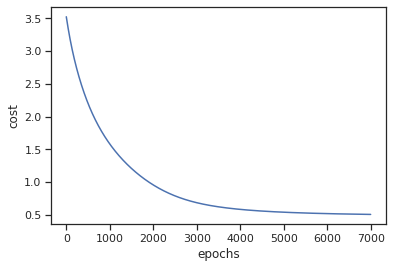

In [0]:
plt.plot(cost_list)
plt.xlabel("epochs")
plt.ylabel("cost")
plt.show()

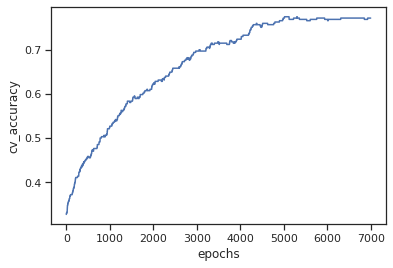

In [0]:
plt.plot(cv_accuracy)
plt.xlabel("epochs")
plt.ylabel("cv_accuracy")
plt.show()

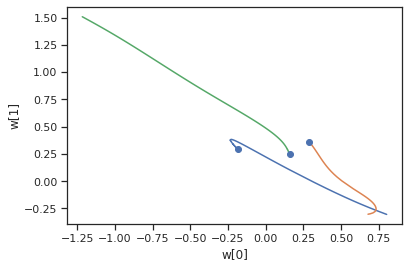

In [0]:
# 가중치 업데이트 과정 그래프 (꽃받침 길이, 꽃받침 너비)
w0 = []
w1 = []
for w in  w_history:
  w0.append(w[0])
  w1.append(w[1])
plt.plot(w0, w1)
plt.plot(w0[-1], w1[-1],'bo')
plt.xlabel('w[0]')
plt.ylabel('w[1]')
plt.show()

In [0]:
# 테스트 세트에 대한 정확도 구하기
x_test_scaled = scaler.transform(x_test)
a = sess.run(accuracy, feed_dict={X:x_test_scaled, Y:y_test})
print("정확도 : ", str(a*100)[:5], "%", sep="")

정확도 : 71.52%


In [0]:
# 임의의 샘플데이터 5개로 예측값 구해보기
X_test_5 = np.array([[0.63, 4.34, 2.90, 0.47, 0.48, 0.41, 46.7, 54.7, 37.9, 43.2, 0.56, 0.60, 0.60],
                      [0, 5, 9, 1, 1, 0, 80, 60, 50, 70, 1, 1, 1],
                      [1, 5, 3, 1, 1, 0, 46.7, 54.7, 37.9, 43.2, 1, 1, 0],
                      [0, 5, 0, 1, 1, 0, 0, 4, 3, 2, 0, 0, 0], 
                      [0, 5, 0, 1, 1, 0, 10, 10, 10, 10, 1, 1, 1], 
                      [0, 5, 0, 1, 1, 0, 10, 10, 10, 10, 0, 0, 1], 
                      [0, 5, 0, 1, 1, 0, 10, 10, 10, 10, 1, 1, 0], 
                     [0, 5, 3, 1, 1, 1, 180, 80, 57, 143, 1, 1, 1]]) 
X_test_5_scaled = scaler.transform(X_test_5)

In [0]:
print(sess.run(prediction, feed_dict={X:X_test_5_scaled}))

[2 0 2 1 2 1 1 0]


In [0]:
result_df = pd.DataFrame(X_test_5, columns=['성별', '국적', '학년', '반', '학기', '부모', '질문횟수', '교육과정 확인 횟수', '공지 확인 횟수', '토론 참여 횟수', '학부모 응답 조사', '학부모 만족도', '학생 결석일'])

In [0]:
result_df

,성별,국적,학년,반,학기,부모,질문횟수,교육과정 확인 횟수,공지 확인 횟수,토론 참여 횟수,학부모 응답 조사,학부모 만족도,학생 결석일
0,0.63,4.34,2.9,0.47,0.48,0.41,46.7,54.7,37.9,43.2,0.56,0.6,0.6
1,0.00,5.00,9.0,1.00,1.00,0.00,80.0,60.0,50.0,70.0,1.00,1.0,1.0
2,1.00,5.00,3.0,1.00,1.00,0.00,46.7,54.7,37.9,43.2,1.00,1.0,0.0
3,0.00,5.00,0.0,1.00,1.00,0.00,0.0,4.0,3.0,2.0,0.00,0.0,0.0
4,0.00,5.00,0.0,1.00,1.00,0.00,10.0,10.0,10.0,10.0,1.00,1.0,1.0
5,0.00,5.00,0.0,1.00,1.00,0.00,10.0,10.0,10.0,10.0,0.00,0.0,1.0
6,0.00,5.00,0.0,1.00,1.00,0.00,10.0,10.0,10.0,10.0,1.00,1.0,0.0
7,0.00,5.00,3.0,1.00,1.00,1.00,180.0,80.0,57.0,143.0,1.00,1.0,1.0


In [0]:
result_df['예상 등급'] = sess.run(prediction, feed_dict={X:X_test_5_scaled})

In [0]:
result_df['예상 등급'] = labelEncoder.inverse_transform(result_df['예상 등급']) # 역 레이블 인코딩(정수->문자열 레이블)

In [0]:
result_df

,성별,국적,학년,반,학기,부모,질문횟수,교육과정 확인 횟수,공지 확인 횟수,토론 참여 횟수,학부모 응답 조사,학부모 만족도,학생 결석일,예상 등급
0,0.63,4.34,2.9,0.47,0.48,0.41,46.7,54.7,37.9,43.2,0.56,0.6,0.6,M
1,0.00,5.00,9.0,1.00,1.00,0.00,80.0,60.0,50.0,70.0,1.00,1.0,1.0,H
2,1.00,5.00,3.0,1.00,1.00,0.00,46.7,54.7,37.9,43.2,1.00,1.0,0.0,M
3,0.00,5.00,0.0,1.00,1.00,0.00,0.0,4.0,3.0,2.0,0.00,0.0,0.0,L
4,0.00,5.00,0.0,1.00,1.00,0.00,10.0,10.0,10.0,10.0,1.00,1.0,1.0,M
5,0.00,5.00,0.0,1.00,1.00,0.00,10.0,10.0,10.0,10.0,0.00,0.0,1.0,L
6,0.00,5.00,0.0,1.00,1.00,0.00,10.0,10.0,10.0,10.0,1.00,1.0,0.0,L
7,0.00,5.00,3.0,1.00,1.00,1.00,180.0,80.0,57.0,143.0,1.00,1.0,1.0,H


In [0]:
try:
  x_input = input("입력(성별, 국적, 학년, 반, 학기, 부모, 질문횟수, 교육과정 확인 횟수, 공지 확인 횟수, 토론 참여 횟수, 학부모 응답 조사, 학부모 만족도, 학생 결석일): ")
  if x_input == 'x':
    raise NotImplementedError
  x_input_strip =[ float(i.strip()) for i in x_input.split(",")]
 
  for i in x_input_strip:
    print(i,end="\t")
  print()
  x_input_test = np.array([x_input_strip]).astype('float32')

  x_input_test_scaled = scaler.transform(x_input_test)

  print("예상 결과 : ", (sess.run(prediction, feed_dict={X:x_input_test_scaled}))) 
  
except ValueError:
  print("입력을 다시 확인해주세요")
except NotImplementedError:
  print("종료")

KeyboardInterrupt: ignored

In [0]:
sess.close()